In [1]:

import pandas as pd

import numpy as np

from datetime import datetime

%matplotlib inline

pd.set_option('display.max_rows', 500)

## Data Preparation

Focus is to understand the final data structure

Support each step by visual analytics

## John Hopkins GITHUB csv Data

In [2]:
data_path='C:/Users/Nitin/ds-covid19/data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)

In [3]:
pd_raw

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,37345,37424,37431,37551,37596,37599,37599,37599,37856,37894
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,6817,6971,7117,7260,7380,7499,7654,7812,7967,8119
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,36699,37187,37664,38133,38583,39025,39444,39847,40258,40667
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,977,981,989,989,989,1005,1005,1024,1024,1045
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1762,1815,1852,1879,1906,1935,1966,2015,2044,2068
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,92,92,93,93,93,93,93,94,94,94
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,268574,276072,282437,289100,294569,299126,305966,312659,320884,329043
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,40794,41023,41299,41495,41663,41701,41846,42056,42319,42477
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,113,113,113,113,113,113,113,113,113,113
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,3927,3936,3945,3950,3957,3959,3966,3971,3972,3981


In [4]:
pd_raw.columns[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '8/12/20', '8/13/20', '8/14/20', '8/15/20', '8/16/20', '8/17/20',
       '8/18/20', '8/19/20', '8/20/20', '8/21/20'],
      dtype='object', length=213)

In [5]:
time_idx=pd_raw.columns[4:]

In [6]:
df_plot = pd.DataFrame({
    'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [7]:
pd_raw['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                   Antigua and Barbuda
6                             Argentina
7                               Armenia
8                             Australia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                              Austria
17                           Azerbaijan
18                              Bahamas
19                              Bahrain
20                           Bangladesh
21                             Barbados
22                              Belarus
23                              Belgium
24                               Belize


In [8]:
pd_raw[pd_raw['Country/Region']=='Germany'].iloc[:,4::].sum(axis=0)

1/22/20         0
1/23/20         0
1/24/20         0
1/25/20         0
1/26/20         0
1/27/20         1
1/28/20         4
1/29/20         4
1/30/20         4
1/31/20         5
2/1/20          8
2/2/20         10
2/3/20         12
2/4/20         12
2/5/20         12
2/6/20         12
2/7/20         13
2/8/20         13
2/9/20         14
2/10/20        14
2/11/20        16
2/12/20        16
2/13/20        16
2/14/20        16
2/15/20        16
2/16/20        16
2/17/20        16
2/18/20        16
2/19/20        16
2/20/20        16
2/21/20        16
2/22/20        16
2/23/20        16
2/24/20        16
2/25/20        17
2/26/20        27
2/27/20        46
2/28/20        48
2/29/20        79
3/1/20        130
3/2/20        159
3/3/20        196
3/4/20        262
3/5/20        482
3/6/20        670
3/7/20        799
3/8/20       1040
3/9/20       1176
3/10/20      1457
3/11/20      1908
3/12/20      2078
3/13/20      3675
3/14/20      4585
3/15/20      5795
3/16/20      7272
3/17/20   

In [9]:
country_list=['Italy',
             'US',
             'Spain',
             'Germany',
             'Korea,South',
             ]

In [10]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

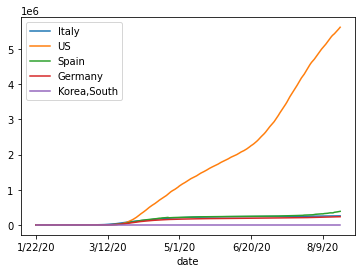

In [11]:
%matplotlib inline
df_plot.set_index('date').plot()

## Data Type Date

In [12]:
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea,South"
0,1/22/20,0,1,0,0,0
1,1/23/20,0,1,0,0,0
2,1/24/20,0,2,0,0,0
3,1/25/20,0,2,0,0,0
4,1/26/20,0,5,0,0,0


In [13]:
from datetime import datetime

In [14]:
time_idx=[datetime.strptime(each,"%m/%d/%y") for each in df_plot.date] #convert to datetime
time_str=[each.strftime('%Y-%m-%d') for each in time_idx] #convert back to date ISO norm (str)

In [15]:
df_plot['date']=time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea,South"
0,2020-01-22,0,1,0,0,0
1,2020-01-23,0,1,0,0,0
2,2020-01-24,0,2,0,0,0
3,2020-01-25,0,2,0,0,0
4,2020-01-26,0,5,0,0,0


In [17]:
df_plot.to_csv('C:/Users/Nitin/ds-covid19/data/processed/COVID_small_flat_table.csv',sep=';',index=False)

## Relational Data Model  - defining a Primary Key

In a relational model, a primary key is a specific choice of a minimal set of attributes (columns) that uniquely specify a tuple (row) in a relation (table) (Source: Wiki)

The main features of a primary key are:

It must contain a unique value for each row of data

It cannot contain null values

In [18]:
data_path='C:/Users/Nitin/ds-covid19/data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)
pd_raw

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,37345,37424,37431,37551,37596,37599,37599,37599,37856,37894
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,6817,6971,7117,7260,7380,7499,7654,7812,7967,8119
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,36699,37187,37664,38133,38583,39025,39444,39847,40258,40667
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,977,981,989,989,989,1005,1005,1024,1024,1045
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1762,1815,1852,1879,1906,1935,1966,2015,2044,2068
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,92,92,93,93,93,93,93,94,94,94
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,268574,276072,282437,289100,294569,299126,305966,312659,320884,329043
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,40794,41023,41299,41495,41663,41701,41846,42056,42319,42477
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,113,113,113,113,113,113,113,113,113,113
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,3927,3936,3945,3950,3957,3959,3966,3971,3972,3981


In [19]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'country',
                                   'Province/State':'state'})

In [20]:
pd_data_base=pd_data_base.drop(['Lat','Long'],axis=1)
pd_data_base

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,37345,37424,37431,37551,37596,37599,37599,37599,37856,37894
1,NaN,Albania,0,0,0,0,0,0,0,0,...,6817,6971,7117,7260,7380,7499,7654,7812,7967,8119
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,36699,37187,37664,38133,38583,39025,39444,39847,40258,40667
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,977,981,989,989,989,1005,1005,1024,1024,1045
4,NaN,Angola,0,0,0,0,0,0,0,0,...,1762,1815,1852,1879,1906,1935,1966,2015,2044,2068
5,NaN,Antigua and Barbuda,0,0,0,0,0,0,0,0,...,92,92,93,93,93,93,93,94,94,94
6,NaN,Argentina,0,0,0,0,0,0,0,0,...,268574,276072,282437,289100,294569,299126,305966,312659,320884,329043
7,NaN,Armenia,0,0,0,0,0,0,0,0,...,40794,41023,41299,41495,41663,41701,41846,42056,42319,42477
8,Australian Capital Territory,Australia,0,0,0,0,0,0,0,0,...,113,113,113,113,113,113,113,113,113,113
9,New South Wales,Australia,0,0,0,0,3,4,4,4,...,3927,3936,3945,3950,3957,3959,3966,3971,3972,3981


In [21]:
pd_relational_model=pd_data_base.set_index(['state','country']).T

In [22]:
pd_relational_model.stack()\
      .reset_index()

state,level_0,country,Alberta,Anguilla,Anhui,Aruba,Australian Capital Territory,Beijing,Bermuda,"Bonaire, Sint Eustatius and Saba",...,Tasmania,Tianjin,Tibet,Turks and Caicos Islands,Victoria,Western Australia,Xinjiang,Yukon,Yunnan,Zhejiang
0,1/22/20,Australia,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1/22/20,Canada,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,1/22/20,China,NaN,NaN,1.0,NaN,NaN,14.0,NaN,NaN,...,NaN,4.0,0.0,NaN,NaN,NaN,0.0,NaN,1.0,10.0
3,1/22/20,Denmark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/22/20,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1486,8/21/20,China,NaN,NaN,991.0,NaN,NaN,935.0,NaN,NaN,...,NaN,216.0,1.0,NaN,NaN,NaN,902.0,NaN,195.0,1277.0
1487,8/21/20,Denmark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1488,8/21/20,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1489,8/21/20,Netherlands,NaN,NaN,NaN,1464.0,NaN,NaN,NaN,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
pd_relational_model=pd_relational_model.stack(level=[0,1]).reset_index()\
                     .rename(columns={'level_0':'date',0:'confirmed'})

In [30]:
pd_relational_model

,date,state,country,confirmed
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0
...,...,...,...,...
96271,8/21/20,Zhejiang,West Bank and Gaza,18313.0
96272,8/21/20,Zhejiang,Western Sahara,10.0
96273,8/21/20,Zhejiang,Yemen,1906.0
96274,8/21/20,Zhejiang,Zambia,10627.0


In [31]:
pd_relational_model["date"]=pd_relational_model.date.astype('datetime64[ns]')

In [32]:
pd_relational_model.dtypes

date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object

In [33]:
pd_relational_model.to_csv('C:/Users/Nitin/ds-covid19/data/processed/COVID_relational_confirmed.csv',sep=';')

## Group-by Apply

In [34]:
pd_JH_data=pd.read_csv('C:/Users/Nitin/ds-covid19/data/processed/COVID_relational_confirmed.csv',sep=';',parse_dates=[0])
pd_JH_data=pd_JH_data.sort_values('date',ascending=True).reset_index(drop=True).copy()
pd_JH_data

,Unnamed: 0,date,state,country,confirmed
0,0,2020-01-22,NaN,Afghanistan,0.0
1,308,2020-01-22,Zhejiang,Cuba,0.0
2,307,2020-01-22,Zhejiang,Croatia,0.0
3,306,2020-01-22,Zhejiang,Cote d'Ivoire,0.0
4,305,2020-01-22,Zhejiang,Costa Rica,0.0
...,...,...,...,...,...
96271,95967,2020-08-21,NaN,San Marino,704.0
96272,95966,2020-08-21,NaN,Saint Vincent and the Grenadines,58.0
96273,95965,2020-08-21,NaN,Saint Lucia,26.0
96274,95991,2020-08-21,NaN,Timor-Leste,25.0


In [35]:
test_data=pd_JH_data[((pd_JH_data['country']=='US')|
                     (pd_JH_data['country']=='Germany'))&
                     (pd_JH_data['date']>'2020-03-20')]

In [36]:
test_data

,Unnamed: 0,date,state,country,confirmed
26701,26998,2020-03-21,Zhejiang,Germany,22213.0
26823,27106,2020-03-21,Zhejiang,US,25825.0
26912,26732,2020-03-21,NaN,Germany,22213.0
27030,26840,2020-03-21,NaN,US,25825.0
27155,27450,2020-03-22,Zhejiang,Germany,24873.0
...,...,...,...,...,...
95734,95544,2020-08-20,NaN,US,5573847.0
95858,96154,2020-08-21,Zhejiang,Germany,233029.0
95976,96262,2020-08-21,Zhejiang,US,5622540.0
96066,95888,2020-08-21,NaN,Germany,233029.0


In [37]:
pd_JH_data

,Unnamed: 0,date,state,country,confirmed
0,0,2020-01-22,NaN,Afghanistan,0.0
1,308,2020-01-22,Zhejiang,Cuba,0.0
2,307,2020-01-22,Zhejiang,Croatia,0.0
3,306,2020-01-22,Zhejiang,Cote d'Ivoire,0.0
4,305,2020-01-22,Zhejiang,Costa Rica,0.0
...,...,...,...,...,...
96271,95967,2020-08-21,NaN,San Marino,704.0
96272,95966,2020-08-21,NaN,Saint Vincent and the Grenadines,58.0
96273,95965,2020-08-21,NaN,Saint Lucia,26.0
96274,95991,2020-08-21,NaN,Timor-Leste,25.0


In [38]:
test_data.groupby(['country']).agg(np.max)

AssertionError: 

In [39]:
# %load C:\Users\Nitin\ds-covid19\src\features\build_features.py
import numpy as np
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=True)

def get_doubling_time_via_regression(in_array):
    ''' Use a linear regression to approximate the doubling rate'''

    y = np.array(in_array)
    X = np.arange(-1,2).reshape(-1,1)

    assert len(in_array)==3

    reg.fit(X,y)
    intercept=reg.intercept_
    slope=reg.coef_

    return intercept/slope



#if __name__ == '__main__':
    #test_data=np.array([2,4,6])
    #result=get_doubling_time_via_regression(test_data)
    #print('The test slope is: '+str(result))


In [40]:
test_data.groupby(['state','country']).agg(np.max)

Unnamed: 0        date  confirmed
state    country                                  
Zhejiang Germany      96154  2020-08-21   233029.0
         US           96262  2020-08-21  5622540.0

In [ ]:
#test_data.groupby(['state','country']).apply(get_doubling_time_via_regression)

In [41]:
pd_JH_data

,Unnamed: 0,date,state,country,confirmed
0,0,2020-01-22,NaN,Afghanistan,0.0
1,308,2020-01-22,Zhejiang,Cuba,0.0
2,307,2020-01-22,Zhejiang,Croatia,0.0
3,306,2020-01-22,Zhejiang,Cote d'Ivoire,0.0
4,305,2020-01-22,Zhejiang,Costa Rica,0.0
...,...,...,...,...,...
96271,95967,2020-08-21,NaN,San Marino,704.0
96272,95966,2020-08-21,NaN,Saint Vincent and the Grenadines,58.0
96273,95965,2020-08-21,NaN,Saint Lucia,26.0
96274,95991,2020-08-21,NaN,Timor-Leste,25.0


In [42]:
def rolling_reg(df_input,col='confirmed'):
    ''' input has to be a data frame'''
    ''' return is single series (mandatory for group apply)'''
    days_back=3
    result=df_input[col].rolling(
                window=days_back,
                min_periods=days_back).apply(get_doubling_time_via_regression,raw=False)
    return result

In [43]:
test_data[['state','country','confirmed']].groupby(['state','country']).apply(rolling_reg,'confirmed')

state     country       
Zhejiang  Germany  26701            NaN
                   27155            NaN
                   27607       7.417994
                   28058       7.142035
                   28511       8.012983
                   28962       6.954407
                   29415       6.501919
                   29866       7.390371
                   30320      10.136671
                   30772      13.541893
                   31222      13.781393
                   31674      13.140681
                   32128      12.037271
                   32578      12.735506
                   33031      16.052694
                   33483      21.372453
                   33933      27.427355
                   34385      27.511936
                   34837      21.792179
                   35289      21.495848
                   35741      26.565108
                   36195      36.198404
                   36646      43.982990
                   37098      49.423444
               

In [44]:
pd_DR_result=pd_JH_data[['state','country','confirmed']].groupby(['state','country']).apply(rolling_reg,'confirmed').reset_index()

In [45]:
pd_JH_data

,Unnamed: 0,date,state,country,confirmed
0,0,2020-01-22,NaN,Afghanistan,0.0
1,308,2020-01-22,Zhejiang,Cuba,0.0
2,307,2020-01-22,Zhejiang,Croatia,0.0
3,306,2020-01-22,Zhejiang,Cote d'Ivoire,0.0
4,305,2020-01-22,Zhejiang,Costa Rica,0.0
...,...,...,...,...,...
96271,95967,2020-08-21,NaN,San Marino,704.0
96272,95966,2020-08-21,NaN,Saint Vincent and the Grenadines,58.0
96273,95965,2020-08-21,NaN,Saint Lucia,26.0
96274,95991,2020-08-21,NaN,Timor-Leste,25.0


In [46]:
pd_DR_result=pd_DR_result.rename(columns={'confirmed':'doubling_rate',
                                         'level_2':'index'})
pd_DR_result

,state,country,index,doubling_rate
0,Alberta,Canada,351,NaN
1,Alberta,Canada,801,NaN
2,Alberta,Canada,1252,NaN
3,Alberta,Canada,1705,NaN
4,Alberta,Canada,2157,NaN
...,...,...,...,...
56653,Zhejiang,Zimbabwe,94241,79.520202
56654,Zhejiang,Zimbabwe,94635,90.866097
56655,Zhejiang,Zimbabwe,95063,32.495522
56656,Zhejiang,Zimbabwe,95483,30.455949


In [47]:
pd_JH_data=pd_JH_data.reset_index()
pd_JH_data

,index,Unnamed: 0,date,state,country,confirmed
0,0,0,2020-01-22,NaN,Afghanistan,0.0
1,1,308,2020-01-22,Zhejiang,Cuba,0.0
2,2,307,2020-01-22,Zhejiang,Croatia,0.0
3,3,306,2020-01-22,Zhejiang,Cote d'Ivoire,0.0
4,4,305,2020-01-22,Zhejiang,Costa Rica,0.0
...,...,...,...,...,...,...
96271,96271,95967,2020-08-21,NaN,San Marino,704.0
96272,96272,95966,2020-08-21,NaN,Saint Vincent and the Grenadines,58.0
96273,96273,95965,2020-08-21,NaN,Saint Lucia,26.0
96274,96274,95991,2020-08-21,NaN,Timor-Leste,25.0


In [48]:
pd_result_larg=pd.merge(pd_JH_data,pd_DR_result[['index','doubling_rate']],on=['index'],how='left')

In [ ]:
#pd_result_larg[pd_result_larg['country']=='Germany']

## Filtering the data with Groupby Apply

In [49]:
from scipy import signal

def savgol_filter(df_input,column='confirmed',window=3):
    ''' Savgol Filter which can be used in groupby apply function
        it ensures that the data structure is kept'''
    window=3,
    degree=1
    df_result=df_input
    
    filter_in=df_input[column].fillna(0) #attention with the neutral element here
    
    result=signal.savgol_filter(np.array(filter_in),
                               3,
                               1,
                               mode='nearest')
    
    df_result[column+'_filtered']=result
    return df_result

In [50]:
pd_filtered_result=pd_JH_data[['state','country','confirmed']].groupby(['state','country']).apply(savgol_filter).reset_index()

In [51]:
pd_result_larg=pd.merge(pd_result_larg,pd_filtered_result[['index','confirmed_filtered']],on=['index'],how='left')
pd_result_larg

,index,Unnamed: 0,date,state,country,confirmed,doubling_rate,confirmed_filtered
0,0,0,2020-01-22,NaN,Afghanistan,0.0,NaN,NaN
1,1,308,2020-01-22,Zhejiang,Cuba,0.0,NaN,0.000000
2,2,307,2020-01-22,Zhejiang,Croatia,0.0,NaN,0.000000
3,3,306,2020-01-22,Zhejiang,Cote d'Ivoire,0.0,NaN,0.000000
4,4,305,2020-01-22,Zhejiang,Costa Rica,0.0,NaN,0.000000
...,...,...,...,...,...,...,...,...
96271,96271,95967,2020-08-21,NaN,San Marino,704.0,NaN,NaN
96272,96272,95966,2020-08-21,NaN,Saint Vincent and the Grenadines,58.0,NaN,NaN
96273,96273,95965,2020-08-21,NaN,Saint Lucia,26.0,NaN,NaN
96274,96274,95991,2020-08-21,NaN,Timor-Leste,25.0,NaN,NaN


## Filtered Doubling Rate

In [52]:
pd_filtered_doubling=pd_result_larg[['state','country','confirmed_filtered']].groupby(['state','country']).apply(rolling_reg,'confirmed_filtered').reset_index()

pd_filtered_doubling=pd_filtered_doubling.rename(columns={'confirmed_filtered':'doubling_rate_filtered',
                                                         'level_2':'index'})

pd_filtered_doubling

,state,country,index,doubling_rate_filtered
0,Alberta,Canada,351,NaN
1,Alberta,Canada,801,NaN
2,Alberta,Canada,1252,NaN
3,Alberta,Canada,1705,NaN
4,Alberta,Canada,2157,NaN
...,...,...,...,...
56653,Zhejiang,Zimbabwe,94241,71.843227
56654,Zhejiang,Zimbabwe,94635,54.818493
56655,Zhejiang,Zimbabwe,95063,39.920228
56656,Zhejiang,Zimbabwe,95483,38.366133


In [53]:
pd_result_larg=pd.merge(pd_result_larg,pd_filtered_doubling[['index','doubling_rate_filtered']],on=['index'],how='left')
pd_result_larg.head()

,index,Unnamed: 0,date,state,country,confirmed,doubling_rate,confirmed_filtered,doubling_rate_filtered
0,0,0,2020-01-22,NaN,Afghanistan,0.0,NaN,NaN,NaN
1,1,308,2020-01-22,Zhejiang,Cuba,0.0,NaN,0.0,NaN
2,2,307,2020-01-22,Zhejiang,Croatia,0.0,NaN,0.0,NaN
3,3,306,2020-01-22,Zhejiang,Cote d'Ivoire,0.0,NaN,0.0,NaN
4,4,305,2020-01-22,Zhejiang,Costa Rica,0.0,NaN,0.0,NaN


In [54]:
mask=pd_result_larg['confirmed']>100
pd_result_larg['doubling_rate_filtered']=pd_result_larg['doubling_rate_filtered'].where(mask, other=np.NaN)

In [55]:
pd_result_larg

,index,Unnamed: 0,date,state,country,confirmed,doubling_rate,confirmed_filtered,doubling_rate_filtered
0,0,0,2020-01-22,NaN,Afghanistan,0.0,NaN,NaN,NaN
1,1,308,2020-01-22,Zhejiang,Cuba,0.0,NaN,0.000000,NaN
2,2,307,2020-01-22,Zhejiang,Croatia,0.0,NaN,0.000000,NaN
3,3,306,2020-01-22,Zhejiang,Cote d'Ivoire,0.0,NaN,0.000000,NaN
4,4,305,2020-01-22,Zhejiang,Costa Rica,0.0,NaN,0.000000,NaN
...,...,...,...,...,...,...,...,...,...
96271,96271,95967,2020-08-21,NaN,San Marino,704.0,NaN,NaN,NaN
96272,96272,95966,2020-08-21,NaN,Saint Vincent and the Grenadines,58.0,NaN,NaN,NaN
96273,96273,95965,2020-08-21,NaN,Saint Lucia,26.0,NaN,NaN,NaN
96274,96274,95991,2020-08-21,NaN,Timor-Leste,25.0,NaN,NaN,NaN


In [56]:
pd_result_larg.to_csv('C:/Users/Nitin/ds-covid19/data/processed/COVID_final_set.csv',sep=';',index=False)